## Метрики моделей классификации 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
import sklearn
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

print("версия pandas:", pd.__version__)
print("версия sklearn:", sklearn.__version__)

версия pandas: 2.0.3
версия sklearn: 1.3.0


Загрузка датасета

In [2]:
iris_dataset=load_iris()
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Получение признаков из датасета

In [3]:
print("Ключи feature_names:\n", iris_dataset['feature_names'])
print("Ключи data:\n", iris_dataset['data'])

Ключи feature_names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Ключи data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.

Получение целевой переменной из датасета

In [4]:
print("Ключи target:\n", iris_dataset['target'])
print("Имена target:\n", iris_dataset['target_names'])

Ключи target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Имена target:
 ['setosa' 'versicolor' 'virginica']


Визуализация признаков вместе с классами

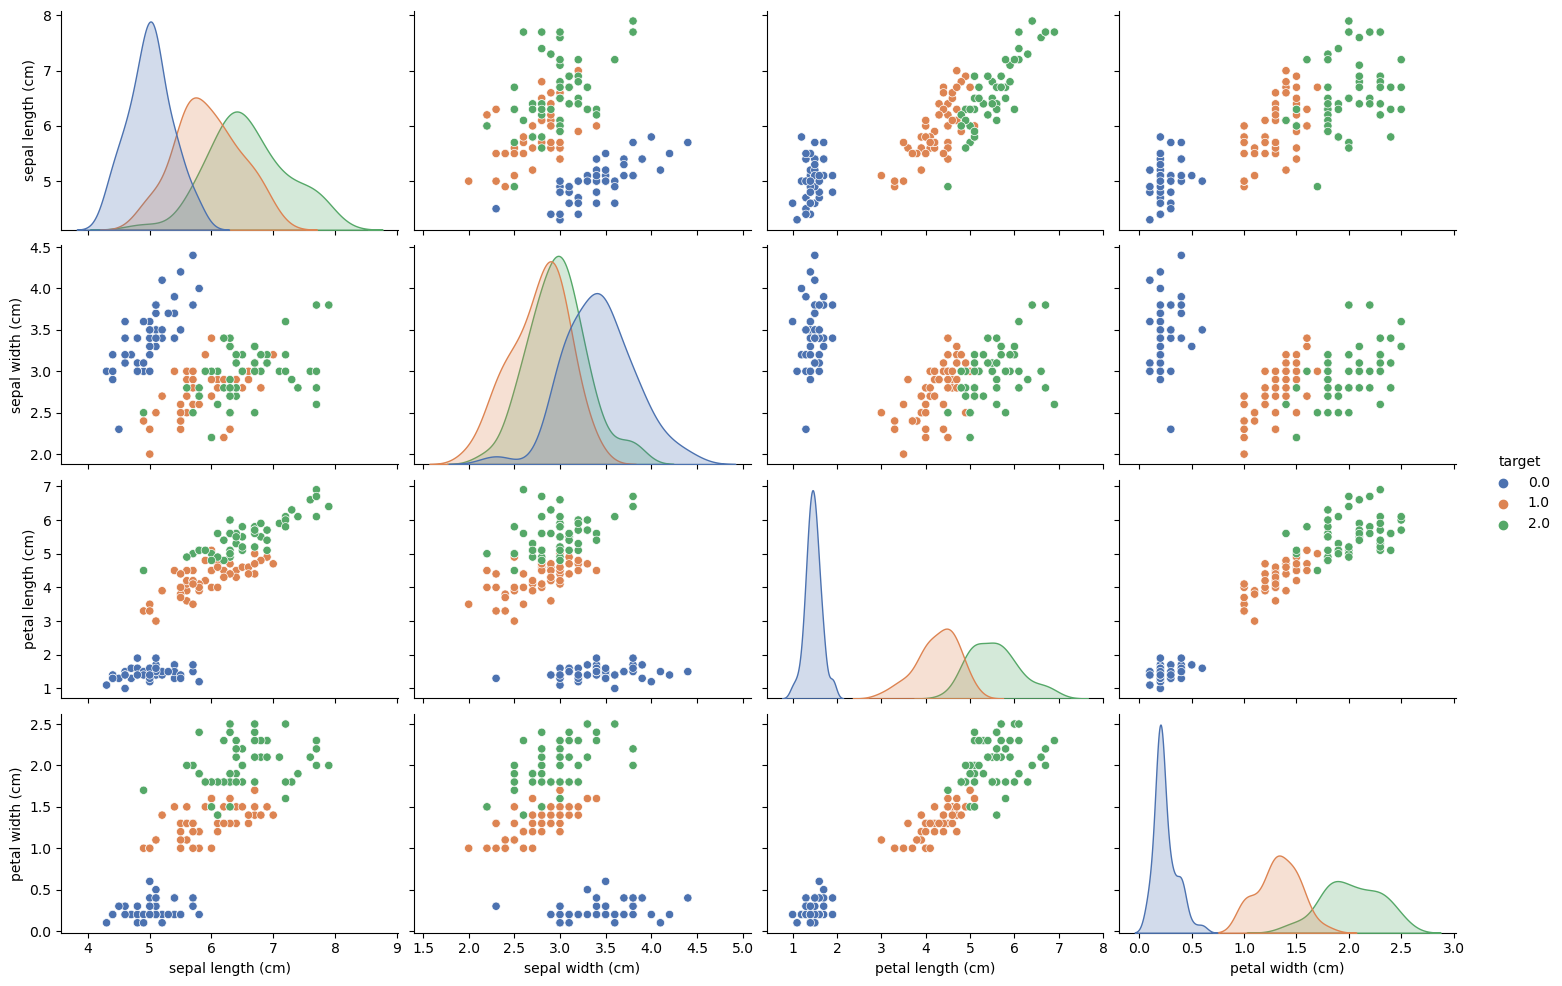

In [5]:
val = np.concatenate((iris_dataset['data'],iris_dataset['target'].reshape(-1,1)), axis=1)
col = iris_dataset['feature_names']+['target']
df = pd.DataFrame(val, columns = col)

sns.pairplot(df, hue='target', palette="deep", aspect=1.5);  

## Делим набор на тренировочный и тестовый
Желательно при классификации использовать стратификацию

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],
                                               stratify =iris_dataset['target'], random_state=42)

In [7]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)

X_train (112, 4)
y_train (112,)


In [8]:
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_test (38, 4)
y_test (38,)


In [9]:
y_train

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1,
       0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0,
       1, 0])

In [10]:
y_test

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

### Обучение с настройками по умолчанию

In [11]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],
                                               stratify =iris_dataset['target'], random_state=42)
knk = KNeighborsClassifier()
knk.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
from sklearn.metrics import accuracy_score
y_pred_train = knk.predict(X_train)
y_pred_test = knk.predict(X_test)

print("Значения правильности на тренировочном наборе:", accuracy_score(y_train, y_pred_train))
print("Значения правильности на тестовом наборе:     ",accuracy_score(y_test, y_pred_test))

Значения правильности на тренировочном наборе: 0.9732142857142857
Значения правильности на тестовом наборе:      0.9736842105263158


### Кросс-валидация

Значения правильности перекрестной проверки: [1.   0.95 1.   0.89 0.95 0.95 1.   1.  ]


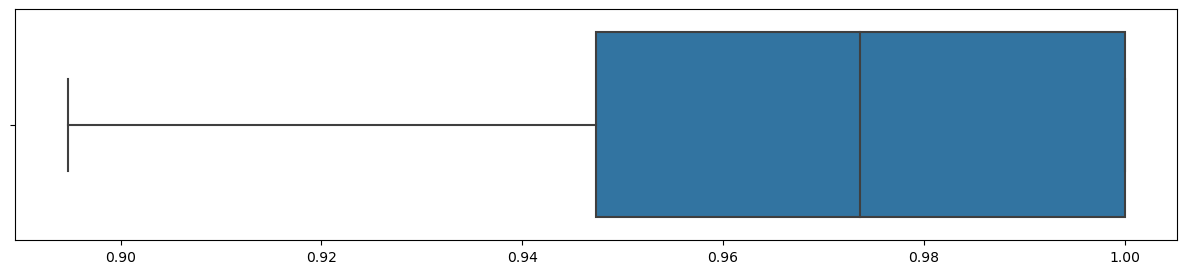

In [13]:
from sklearn.model_selection import cross_val_score 


knk = KNeighborsClassifier()
cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=8)

np.set_printoptions(precision=2)
print("Значения правильности перекрестной проверки:",cross_vall)

plt.figure(figsize=(15,3))
ax = sns.boxplot(x=cross_vall);

### Пербор параметров алгоритма
Цель найти наилучшею комбинацию

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 20],
    'p': [1, 2, 3, 4, 5]
}]

grid = GridSearchCV(knk, param_grid, cv = 8)
grid.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14,
                                          15, 16, 17, 20],
                          'p': [1, 2, 3, 4, 5]}])

In [15]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,61,36,41,60,66,71,31,32,33,34,...,68,76,5,15,6,69,16,17,18,19
mean_fit_time,0.000415,0.000406,0.000413,0.000415,0.000385,0.000381,0.00038,0.000381,0.000378,0.0004,...,0.000395,0.000441,0.000386,0.000371,0.000379,0.000395,0.000403,0.000391,0.000379,0.000382
std_fit_time,0.000033,0.00007,0.000033,0.000015,0.000006,0.000007,0.000019,0.000027,0.000027,0.000052,...,0.000008,0.000081,0.000012,0.000003,0.000004,0.000014,0.000088,0.000038,0.000004,0.000004
mean_score_time,0.001586,0.001574,0.001677,0.001618,0.001529,0.001518,0.001552,0.001479,0.001496,0.001708,...,0.001577,0.001719,0.001498,0.00142,0.001459,0.001588,0.001454,0.001559,0.001493,0.001491
std_score_time,0.000069,0.000152,0.000214,0.000072,0.000063,0.000074,0.000223,0.000031,0.000054,0.000226,...,0.000026,0.000242,0.00009,0.000004,0.00002,0.000055,0.000087,0.000208,0.000036,0.000005
param_n_neighbors,15,8,9,15,16,17,7,7,7,7,...,16,20,2,4,2,16,4,4,4,4
param_p,2,2,2,1,2,2,2,3,4,5,...,4,2,1,1,2,5,2,3,4,5
params,"{'n_neighbors': 15, 'p': 2}","{'n_neighbors': 8, 'p': 2}","{'n_neighbors': 9, 'p': 2}","{'n_neighbors': 15, 'p': 1}","{'n_neighbors': 16, 'p': 2}","{'n_neighbors': 17, 'p': 2}","{'n_neighbors': 7, 'p': 2}","{'n_neighbors': 7, 'p': 3}","{'n_neighbors': 7, 'p': 4}","{'n_neighbors': 7, 'p': 5}",...,"{'n_neighbors': 16, 'p': 4}","{'n_neighbors': 20, 'p': 2}","{'n_neighbors': 2, 'p': 1}","{'n_neighbors': 4, 'p': 1}","{'n_neighbors': 2, 'p': 2}","{'n_neighbors': 16, 'p': 5}","{'n_neighbors': 4, 'p': 2}","{'n_neighbors': 4, 'p': 3}","{'n_neighbors': 4, 'p': 4}","{'n_neighbors': 4, 'p': 5}"
split0_test_score,1.0,0.928571,0.928571,1.0,1.0,1.0,0.928571,0.928571,0.928571,0.928571,...,0.857143,0.857143,0.928571,0.928571,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143
split1_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
split2_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571


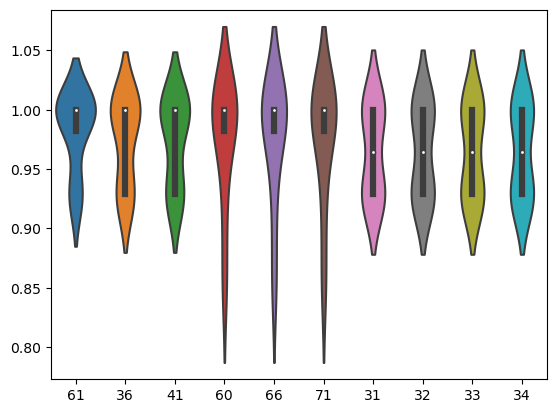

In [16]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.violinplot(data=tabl);

In [17]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [18]:
knk = KNeighborsClassifier(n_neighbors=15)
knk.fit(X_train,y_train)

y_pred_train = knk.predict(X_train)
y_pred_test = knk.predict(X_test)

print("Значения правильности на тренировочном наборе:", accuracy_score(y_train, y_pred_train))
print("Значения правильности на тестовом наборе:     ",accuracy_score(y_test, y_pred_test))

Значения правильности на тренировочном наборе: 0.9821428571428571
Значения правильности на тестовом наборе:      0.9473684210526315
